# Creation of a neural network with Keras for the classification of products from the data set fashion_mnist.

## Models with slightly better results

2.16.1
Num GPUs Available:  1


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,658 (920.54 KB)

 Trainable params: 235,402 (919.54 KB)

 Non-trainable params: 256 (1.00 KB)

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7511 - loss: 0.7168 - val_accuracy: 0.8461 - val_loss: 0.4202 - learning_rate: 5.0000e-04
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8443 - loss: 0.4316 - val_accuracy: 0.8597 - val_loss: 0.3873 - learning_rate: 5.0000e-04
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8590 - loss: 0.3811 - val_accuracy: 0.8711 - val_loss: 0.3599 - learning_rate: 5.0000e-04
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8683 - loss: 0.3584 - val_accuracy: 0.8624 - val_loss: 0.3803 - learning_rate: 5.0000e-04
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8761 - loss: 0.3375 - val_accuracy: 0.8714 - val_loss: 0.3480 - learning_rate: 5.0000e-04
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8814 - loss: 0.3254 - val_accuracy: 0.8779 - val_loss: 0.3387 - learning_rate: 5.0000e-04
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/ste

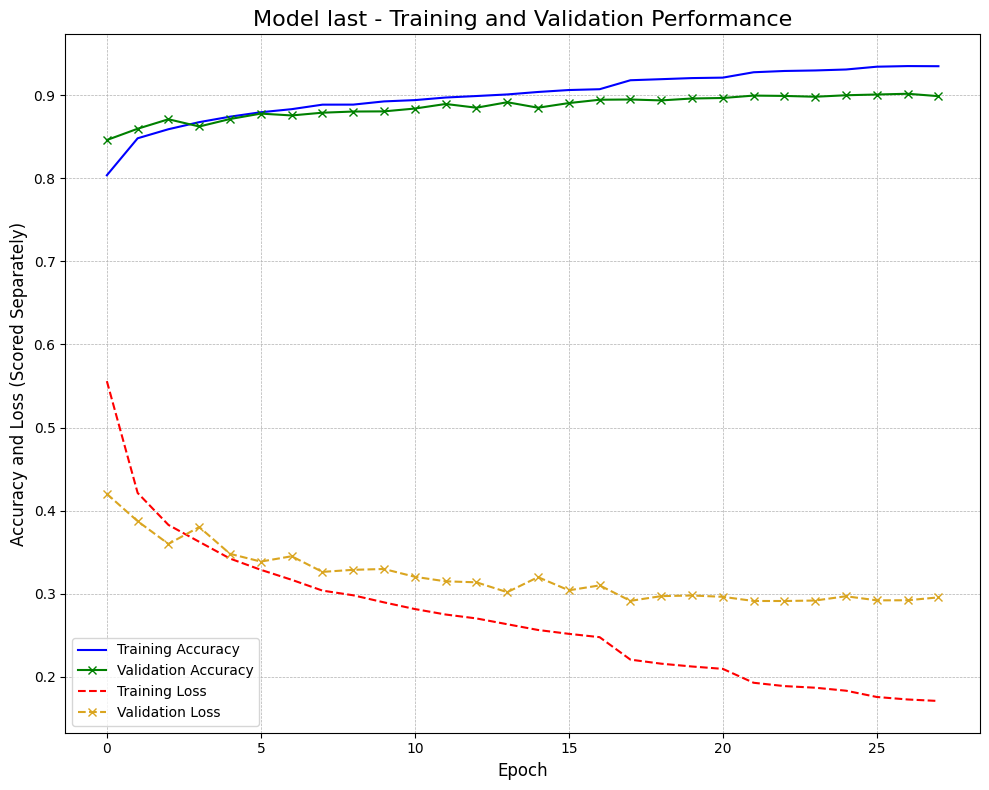

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import RMSprop, SGD, Nadam
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping, ReduceLROnPlateau

import matplotlib.pyplot as plt

%matplotlib inline

print(tf.__version__)

# Disable all GPUs
tf.config.set_visible_devices([], 'GPU')
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))


def plot_model(history=None, model_version='v1'):
    plt.figure(figsize=(10, 8))
    plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='green', marker='x')
    plt.plot(history.history['loss'], label='Training Loss', color='red', linestyle='--')
    plt.plot(history.history['val_loss'], label='Validation Loss', color='goldenrod', linestyle='--', marker='x')
    plt.title(f'Model {model_version} - Training and Validation Performance', fontsize=16)
    plt.xlabel('Epoch', fontsize=12)
    plt.ylabel('Accuracy and Loss (Scored Separately)', fontsize=12)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Load and preprocess the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define the model architecture
# model = Sequential([
#     Flatten(input_shape=(28, 28)),
#     Dense(128, activation='relu'),
#     Dense(10, activation='softmax')
# ])


model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation='relu'),
    # BatchNormalization(),
    Dropout(0.25),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(10, activation='softmax')
])



# Choose an optimizer
# optimizer = RMSprop(learning_rate=0.0005)
# optimizer = SGD(learning_rate=0.01, momentum=0.9)
optimizer = Nadam(learning_rate=0.0005)
# lr_schedule = tf.keras.optimizers.schedules.CosineDecay(
#     initial_learning_rate=0.0005,
#     decay_steps=10000
# )
# optimizer = tf.keras.optimizers.Nadam(learning_rate=lr_schedule)

# Compile the model
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#Learning rate scheduler
# def scheduler(epoch, lr):
#     if epoch < 10:
#         return lr
#     else:
#         return float(lr * tf.math.exp(-0.1))

# callback = LearningRateScheduler(scheduler)

model.summary()

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)



reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir='./logs', histogram_freq=1,write_graph=True, write_images=False)

# Train the model
#%%time
history_model_last = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test), callbacks=[reduce_lr, early_stopping, tensorboard_callback])
# model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test), callbacks=[callback])

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc:0.4f}, Test loss: {test_loss:0.4f}')
plot_model(history_model_last, model_version='last')

2.16.1
Num GPUs Available:  1


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,658 (920.54 KB)

 Trainable params: 235,402 (919.54 KB)

 Non-trainable params: 256 (1.00 KB)

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7546 - loss: 0.7063 - val_accuracy: 0.8419 - val_loss: 0.4343 - learning_rate: 5.0000e-04
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8472 - loss: 0.4246 - val_accuracy: 0.8605 - val_loss: 0.3793 - learning_rate: 5.0000e-04
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8615 - loss: 0.3854 - val_accuracy: 0.8562 - val_loss: 0.3957 - learning_rate: 5.0000e-04
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8708 - loss: 0.3538 - val_accuracy: 0.8687 - val_loss: 0.3609 - learning_rate: 5.0000e-04
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8733 - loss: 0.3447 - val_accuracy: 0.8721 - val_loss: 0.3422 - learning_rate: 5.0000e-04
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8804 - loss: 0.3215 - val_accuracy: 0.8716 - val_loss: 0.3454 - learning_rate: 5.0000e-04
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/ste

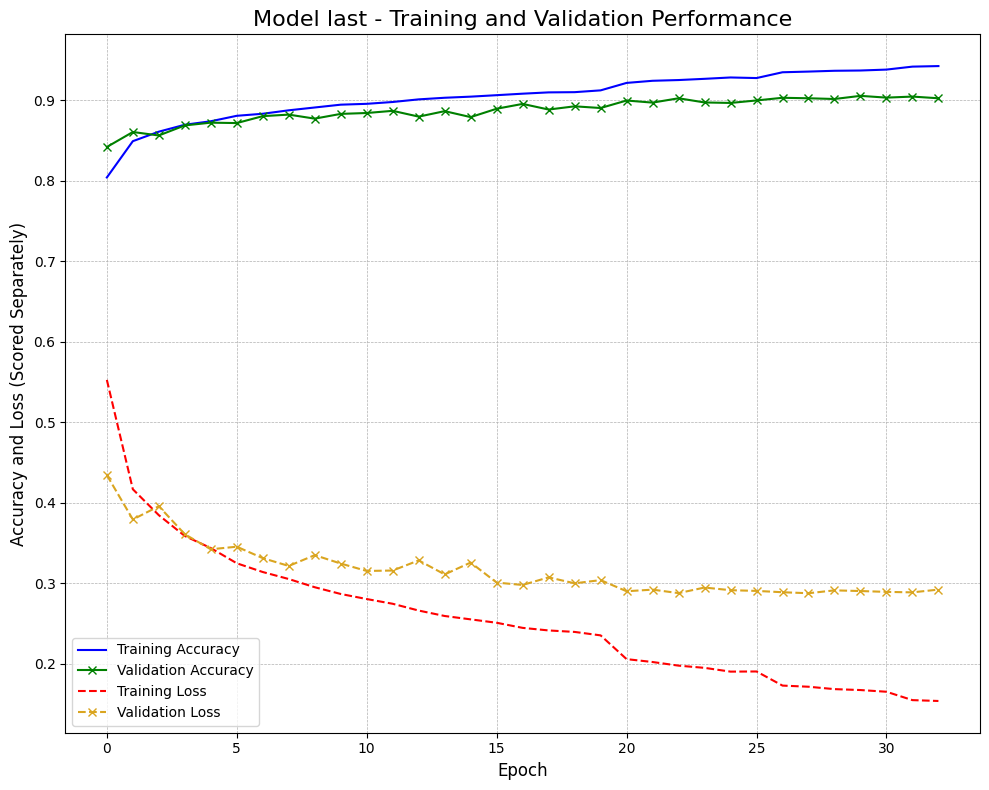

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import RMSprop, SGD, Nadam, Lion
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping, ReduceLROnPlateau

import matplotlib.pyplot as plt


def plot_model(history=None, model_version='v1'):
    plt.figure(figsize=(10, 8))
    plt.plot(history.history['accuracy'],
             label='Training Accuracy', color='blue')
    plt.plot(history.history['val_accuracy'],
             label='Validation Accuracy', color='green', marker='x')
    plt.plot(history.history['loss'],
             label='Training Loss', color='red', linestyle='--')
    plt.plot(history.history['val_loss'], label='Validation Loss',
             color='goldenrod', linestyle='--', marker='x')
    plt.title(
        f'Model {model_version} - Training and Validation Performance', fontsize=16)
    plt.xlabel('Epoch', fontsize=12)
    plt.ylabel('Accuracy and Loss (Scored Separately)', fontsize=12)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.legend()
    plt.tight_layout()
    plt.show()


# Load and preprocess the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define the model architecture
# model = Sequential([
#     Flatten(input_shape=(28, 28)),
#     Dense(128, activation='relu'),
#     Dense(10, activation='softmax')
#     ])


model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation='relu'),
    # BatchNormalization(),
    Dropout(0.25),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(10, activation='softmax')
])

# Choose an optimizer
# optimizer = RMSprop(learning_rate=0.0005)
# optimizer = SGD(learning_rate=0.01, momentum=0.9)
optimizer = Nadam(learning_rate=0.0005)
# optimizer = Lion(learning_rate=0.0005)

# Compile the model
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# Learning rate scheduler (optional)
# def scheduler(epoch, lr):
#     if epoch < 10:
#         return lr
#     else:
#         return float(lr * tf.math.exp(-0.1))
# callback = LearningRateScheduler(scheduler)
# Define early stopping
early_stopping = EarlyStopping(
    monitor='val_loss', patience=5, restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

tensorboard_callback = tf.keras.callbacks.TensorBoard(
    log_dir='./logs', histogram_freq=1, write_graph=True, write_images=False)

# Train the model
# %%time
history_model_last = model.fit(
    x_train, 
    y_train, 
    batch_size=32,
    epochs=50, 
    validation_data=(x_test, y_test), 
    callbacks=[reduce_lr, early_stopping, tensorboard_callback]
    )

# model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test), callbacks=[callback])
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc:0.4f}, Test loss: {test_loss:0.4f}')

plot_model(history_model_last, model_version='last')

## Model Comparison: Fashion MNIST Classification

Both models have identical architectures. They both use:

* Flatten layer (input shape: 28x28)
* Dense layer with 256 ReLU units
* Dropout layer (0.25 probability)
* Dense layer with 128 ReLU units
* BatchNormalization layer
* Dense layer with 10 softmax units (output)

Despite identical architectures, Model 2 achieves slightly better performance on the test set:

* **Model 1:** Test accuracy: 0.8992
* **Model 2:** Test accuracy: 0.9024

The difference in accuracy is small (0.0032), suggesting potential factors like:

* Random weight initialization during training
* Specific optimizer used

Running both models multiple times with different random seeds could help determine if this performance difference is consistent. 